*** Crime_Dataset ***

* Isha Singh (isha.singh@adypu.edu.in)
* Padam Rathi (padam.rathi@adypu.edu.in)
* Sameer Pawar (sameer.pawar@adypu.edu.in)
* Tanush Kumar (tanush.kumar@adypu.edu.in)







In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

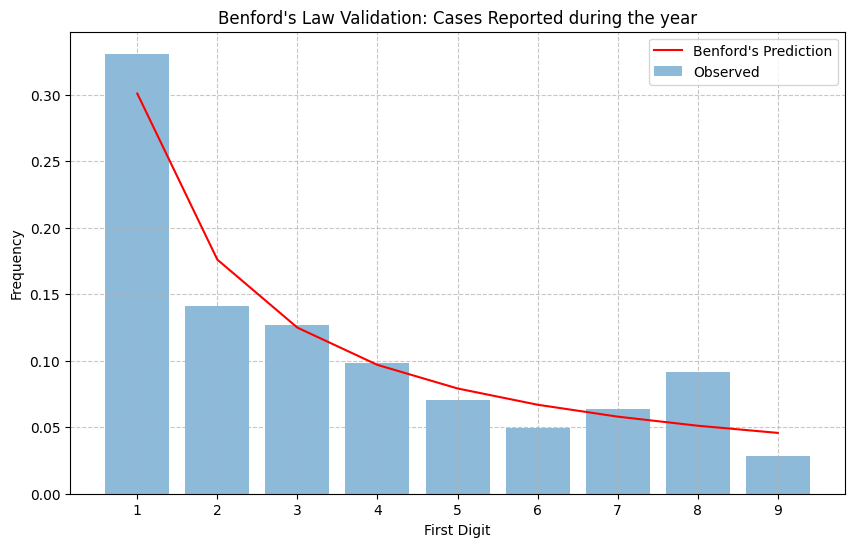

In [11]:

column_to_analyze = 'Cases Reported during the year'


def get_first_digit(number):
    try:
        return int(str(abs(int(number)))[0])
    except:
        return None


crime_df['First_Digit'] = crime_df[column_to_analyze].apply(get_first_digit)
crime_df = crime_df.dropna(subset=['First_Digit'])


observed = crime_df['First_Digit'].value_counts(normalize=True).sort_index()


expected = [np.log10(1 + 1/d) for d in range(1, 10)]
expected_series = pd.Series(expected, index=range(1, 10))


plt.figure(figsize=(10, 6))
plt.bar(observed.index, observed, alpha=0.5, label='Observed')
plt.plot(expected_series.index, expected_series, 'r-', label="Benford's Prediction")
plt.title(f"Benford's Law Validation: {column_to_analyze}")
plt.xlabel("First Digit")
plt.ylabel("Frequency")
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

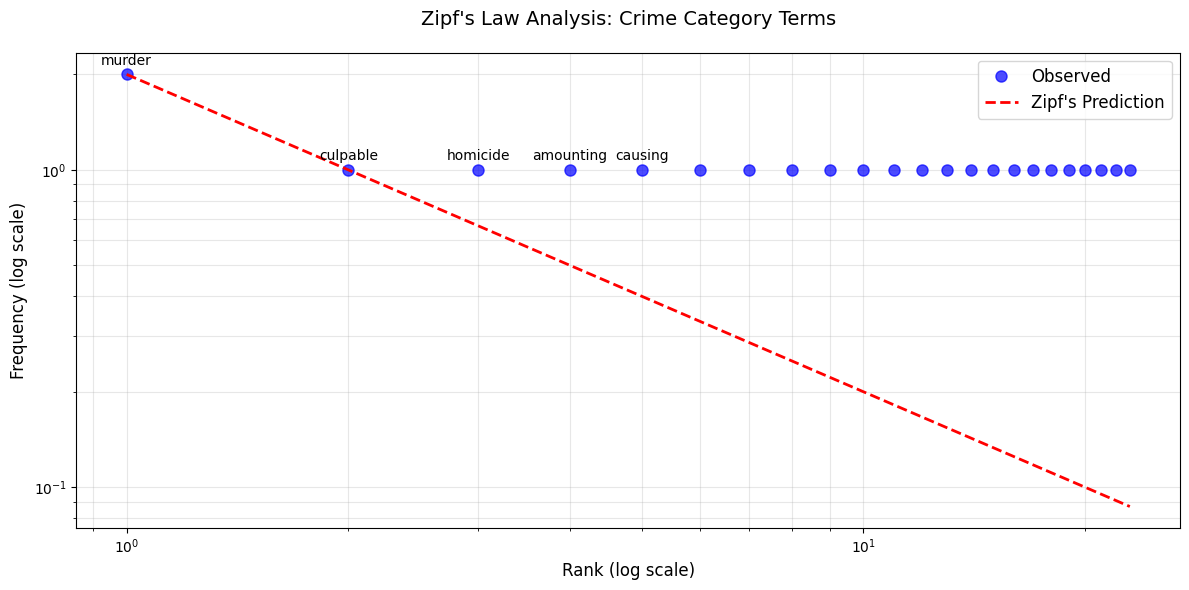

TOP CRIME TERMS BY FREQUENCY:
      Word  Frequency  Rank
    murder          2     1
  culpable          1     2
  homicide          1     3
 amounting          1     4
   causing          1     5
     death          1     6
negligence          1     7
     dowry          1     8
    deaths          1     9
   assault          1    10

ZIPF'S LAW DEVIATION ANALYSIS:
    Word  Frequency  Rank  Zipf_Prediction  Deviation_Pct
 forgery          1    23         0.086957         1050.0
   fraud          1    22         0.090909         1000.0
   theft          1    21         0.095238          950.0
burglary          1    20         0.100000          900.0
 robbery          1    19         0.105263          850.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np

crime_df = pd.DataFrame({
    'Crime Head': [
        'Murder', 'Culpable Homicide not amounting to Murder',
        'Causing Death by Negligence', 'Dowry Deaths',
        'Assault on Women with Intent to Outrage her Modesty',
        'Kidnapping and Abduction', 'Rape', 'Robbery',
        'Burglary', 'Theft', 'Fraud', 'Forgery'
    ],
    'Cases Reported': [28918, 3470, 144842, 7115, 88367, 105037, 32033, 31065, 100897, 675916, 23383, 16194]
})

all_text = " ".join(crime_df['Crime Head'].dropna().str.lower())
words = re.findall(r'\b[a-z]{3,}\b', all_text)
stopwords = {'and', 'the', 'for', 'with', 'of', 'to', 'in', 'by', 'on', 'at', 'not'}
filtered_words = [word for word in words if word not in stopwords]

word_counts = Counter(filtered_words)
freq_df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])
freq_df['Rank'] = range(1, len(freq_df) + 1)

plt.figure(figsize=(12, 6))
plt.loglog(freq_df['Rank'], freq_df['Frequency'], 'bo', markersize=8, alpha=0.7, label='Observed')
max_freq = freq_df['Frequency'].max()
zipfs_line = [max_freq / rank for rank in freq_df['Rank']]
plt.loglog(freq_df['Rank'], zipfs_line, 'r--', linewidth=2, label="Zipf's Prediction")

for i, (word, freq, rank) in enumerate(zip(freq_df['Word'], freq_df['Frequency'], freq_df['Rank'])):
    if i < 5:
        plt.annotate(word, (rank, freq), textcoords="offset points", xytext=(0, 7), ha='center', fontsize=10)

plt.title("Zipf's Law Analysis: Crime Category Terms", fontsize=14, pad=20)
plt.xlabel("Rank (log scale)", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.tight_layout()
plt.show()

print("TOP CRIME TERMS BY FREQUENCY:")
print(freq_df.head(10).to_string(index=False))

freq_df['Zipf_Prediction'] = max_freq / freq_df['Rank']
freq_df['Deviation_Pct'] = ((freq_df['Frequency'] - freq_df['Zipf_Prediction']) / freq_df['Zipf_Prediction']) * 100

print("\nZIPF'S LAW DEVIATION ANALYSIS:")
print(freq_df.sort_values('Deviation_Pct', ascending=False).head(5).to_string(index=False))

Team members' Contribution:-


1.   Isha Singh
        * Worked on iPython notebook
        * Uploaded project on Github

2.   Padam Rathi
        * Worked on PPT
        * Collected data

3.   Sameer Pawar
        * Worked on PPT
        * Managed designs and overall look

4.   Tanush Kumar
        * Helped in finalizing things








